### **モメンタムを用いた最適化手法 - ADAM**

※本投稿はAndrew Ng教授の講義をまとめたものであることを明示します。

Pythonライブラリを使ったディープラーニング学習アルゴリズムのチュートリアルでは、最適化を行う際にほとんどの場合、Gradient Descentの代わりにADAM Optimizerを使用することが推奨されています。ADAMがGradient Descentに比べてどのような点で優れているのか、その背景について詳しく見ていきましょう。

#### **前提知識**
この投稿を理解するためには、以下の内容を知っていると良いです。

- 勾配降下法（Gradient Descent）
- 勾配降下法の問題点

#### **勾配降下法の問題**
勾配降下法を用いてコスト関数（あるいはエラー）を最小化しようとすると、収束速度が非常に遅くなる場合があります。ステップサイズ（または学習率）を大きくすると収束が速くなる場合もありますが、特定のパラメータに対して振動しながら収束するため、収束が遅くなることがあります。このような場合、誤ってコスト関数が発散することもあり、学習速度が遅くても待つしかない状況になります。



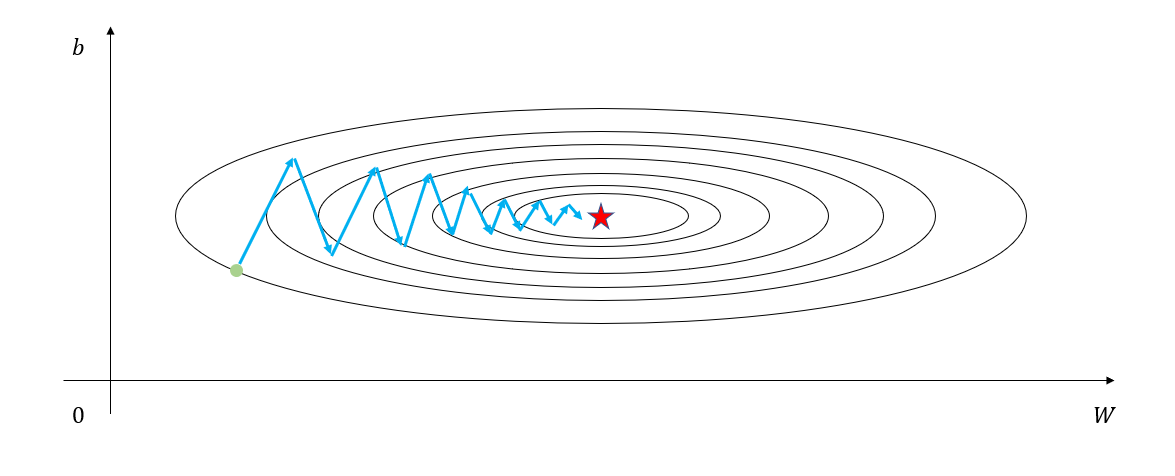
**コスト関数最適化していくとき、特定のパラメータに対して振動しながら収束する場合**

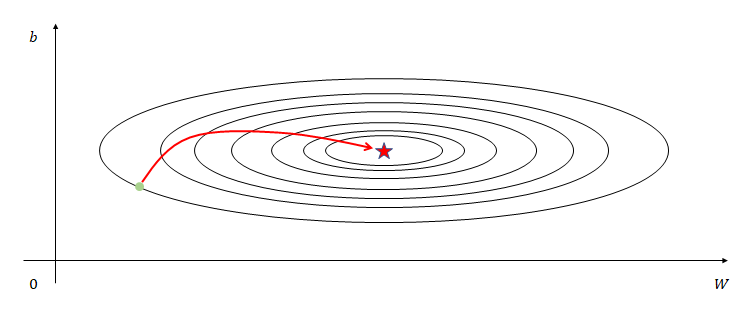

**理想の経路**

#### **モメンタムを使った勾配降下法（Gradient Descent with Momentum）**
モメンタムを導入したGradient Descentは、反復ごとに方向が逆転する場合は更新量を減少させ、反復が同じ方向に続く場合には加速する更新方法です。この方法は「Momentum」と呼ばれ、以下の擬似コードでアルゴリズムの概要を示します。

**Momentumアルゴリズム**
1. 初期化:
   $ V_{dw}(0) = 0 $, $ V_{db}(0) = 0 $
2. 各反復で、現在のバッチに対して $ dW(t) $, $ db(t) $ を計算します。
3. 更新ステップ:
   - $ V_{dw}(t) = \beta_1 V_{dw}(t-1) + (1 - \beta_1) dW(t) $
   - $ V_{db}(t) = \beta_1 V_{db}(t-1) + (1 - \beta_1) db(t) $
   - 重みとバイアスを更新:
     - $ W := W - \alpha V_{dw}(t) $
     - $ b := b - \alpha V_{db}(t) $

#### **RMSProp**
RMSPropは「Root Mean Square Propagation」の略で、Gradientの方向ではなくその大きさを利用して各パラメータの学習速度を調整します。Hintonによって提案されたこのアルゴリズムは、Momentumとほぼ同様の使用方法を持ちながら、より学習速度の調整に優れています。

**RMSPropアルゴリズム**
1. 初期化:
   $ S_{dw}(t) = 0 $, $ S_{db}(t) = 0 $
2. 各反復で、現在のバッチに対して $ dW(t) $, $ db(t) $ を計算します。
3. 更新ステップ:
   - $ S_{dw}(t) = \beta_2 S_{dw}(t-1) + (1 - \beta_2) dW^2(t) $
   - $ S_{db}(t) = \beta_2 S_{db}(t-1) + (1 - \beta_2) db^2(t) $
   - 重みとバイアスを更新:
     - $ W := W - \alpha \frac{dW(t)}{\sqrt{S_{dw}(t)} + \epsilon} $
     - $ b := b - \alpha \frac{db(t)}{\sqrt{S_{db}(t)} + \epsilon} $

#### **ADAM（Adaptive Moment Estimation）**
ADAMは、Gradient Descent with MomentumとRMSPropを組み合わせた手法で、両者の利点を取り入れた最適化アルゴリズムです。

**ADAMアルゴリズム**
1. 初期化:
   $ V_{dw}(0) = 0 $, $ V_{db}(0) = 0 $, $ S_{dw}(0) = 0 $, $ S_{db}(0) = 0 $
2. 各反復で、現在のバッチに対して $ dW $, $ db $ を計算します。
3. 更新ステップ:
   - $ V_{dw}(t) = \beta_1 V_{dw}(t-1) + (1 - \beta_1) dW(t) $
   - $ V_{db}(t) = \beta_1 V_{db}(t-1) + (1 - \beta_1) db(t) $
   - $ S_{dw}(t) = \beta_2 S_{dw}(t-1) + (1 - \beta_2) dW^2(t) $
   - $ S_{db}(t) = \beta_2 S_{db}(t-1) + (1 - \beta_2) db^2(t) $
   - 重みとバイアスを更新:
     - $ W := W - \alpha \frac{V_{dw}(t)}{\sqrt{S_{dw}(t)} + \epsilon} $
     - $ b := b - \alpha \frac{V_{db}(t)}{\sqrt{S_{db}(t)} + \epsilon} $

ADAMの元論文（Kingma & Ba, 2015）では、以下のパラメータが推奨されています:
- $ \beta_1: 0.9 $
- $ \beta_2: 0.99 $
- $ \epsilon: 10^{-8} $

#### **バイアス補正**
Gradient Descent with Momentum, RMSProp, ADAMはいずれも、以前の値を徐々に忘れていく指数加重移動平均（EWMA）の一種です。EWMAの出力を補正することで、各反復の結果をより正確に調整できます。

#### **参考文献**
- ADAM: A Method for Stochastic Optimization, Kingma & Ba, ICLR, 2015

このように、ADAMはGradient Descent with MomentumとRMSPropの利点を組み合わせた強力な最適化手法で、多くのディープラーニングモデルで使用されています。

# 勾配降下法とモメンタム

### Momentumを用いたGradient Descent
Momentumを導入したGradient Descentは、反復によって方向が頻繁に逆転する場合、その方向への更新量が徐々に小さくなり、反復で方向が維持される場合には加速して更新する手法です。この手法はMomentumと呼ばれ、そのアルゴリズムを疑似コードで見てみましょう。

ここでは、モデルのパラメータとして $ W $ と $ b $ の2つを考えます。また、下付きの $(t)$ は第 $t$ 番目の反復で計算されたことを示します。

#### [Momentumアルゴリズム]
1. 初期化:
   $$
   V_{dw}(0) = \vec{0}, \quad V_{db}(0) = \vec{0}
   $$
   （ここで、$ V_{dw}(0) $ の次元は $ W $ の次元と同じで、$ V_{db}(0) $ の次元は $ b $ の次元と同じです。）

2. 第 $t$ 番目の反復で:
   - 現在のバッチに対して $ dW(t) $ と $ db(t) $ を計算する。
   - 以下の項を計算する。
     $$
     V_{dw}(t) = \beta_1 V_{dw}(t-1) + (1 - \beta_1)dW(t)
     \tag{1}
     $$
     $$
     V_{db}(t) = \beta_1 V_{db}(t-1) + (1 - \beta_1)db(t)
     \tag{2}
     $$

3. 重みとバイアスの更新:
   $$
   W := W - \alpha V_{dw}(t)
   \tag{3}
   $$
   $$
   b := b - \alpha V_{db}(t)
   \tag{4}
   $$
   （ここで、$\alpha$ は学習率です。）

### Momentumアルゴリズムの意味
Momentumアルゴリズムの核心は式 (1) と (2) にあり、両式の形式はほぼ同じなので、式 (1) を詳しく見てみましょう。式 (1) は再帰的に計算され、各反復での速度を過去の速度に依存して更新します。過去の勾配情報を使って、方向を保持する場合には更新が加速され、方向が変わる場合には減速します。例えば、グラフの左右に揺れるような勾配パターンがあると、左右方向の速度は徐々に小さくなり、方向が一定のときに速度が増すようになります。

### RMSProp
RMSProp（Root Mean Square Propagation）はGeoffrey Hintonが提案したアルゴリズムです。Momentumの勾配の大きさのみを利用し、学習速度を調整します。RMSPropアルゴリズムの疑似コードは以下の通りです。

#### [RMSPropアルゴリズム]
1. 初期化:
   $$
   S_{dw}(0) = \vec{0}, \quad S_{db}(0) = \vec{0}
   $$

2. 第 $t$ 番目の反復で:
   - 現在のバッチに対して $ dW(t) $ と $ db(t) $ を計算する。
   - 以下の項を計算する。
     $$
     S_{dw}(t) = \beta_2 S_{dw}(t-1) + (1 - \beta_2)dW^2(t)
     \tag{15}
     $$
     $$
     S_{db}(t) = \beta_2 S_{db}(t-1) + (1 - \beta_2)db^2(t)
     \tag{16}
     $$

3. 重みとバイアスの更新:
   $$
   W := W - \frac{\alpha dW(t)}{\sqrt{S_{dw}(t)} + \epsilon}
   \tag{17}
   $$
   $$
   b := b - \frac{\alpha db(t)}{\sqrt{S_{db}(t)} + \epsilon}
   \tag{18}
   $$
   （ここで、$\epsilon$ はゼロ除算を防ぐための小さな正の数です。）

RMSPropは勾配の大きさを利用して各パラメータごとに適切に学習率を調整します。

### ADAM（Adaptive Moment Estimation）
ADAMはMomentumとRMSPropを組み合わせた手法です。以下はADAMアルゴリズムの疑似コードです。

#### [ADAMアルゴリズム]
1. 初期化:
   $$
   V_{dw}(0) = \vec{0}, \quad V_{db}(0) = \vec{0}, \quad S_{dw}(0) = \vec{0}, \quad S_{db}(0) = \vec{0}
   $$

2. 第 $t$ 番目の反復で:
   - 現在のバッチに対して $ dW $ と $ db $ を計算する。
   - 以下の項を計算する。
     $$
     V_{dw}(t) = \beta_1 V_{dw}(t-1) + (1 - \beta_1)dW(t)
     \tag{19}
     $$
     $$
     V_{db}(t) = \beta_1 V_{db}(t-1) + (1 - \beta_1)db(t)
     \tag{20}
     $$
     $$
     S_{dw}(t) = \beta_2 S_{dw}(t-1) + (1 - \beta_2)dW^2(t)
     \tag{21}
     $$
     $$
     S_{db}(t) = \beta_2 S_{db}(t-1) + (1 - \beta_2)db^2(t)
     \tag{22}
     $$

3. 重みとバイアスの更新:
   $$
   W := W - \frac{\alpha V_{dw}(t)}{\sqrt{S_{dw}(t)} + \epsilon}
   \tag{23}
   $$
   $$
   b := b - \frac{\alpha V_{db}(t)}{\sqrt{S_{db}(t)} + \epsilon}
   \tag{24}
   $$

ADAMは、各パラメータごとに勾配の大きさと方向を利用して、最適な更新を行う非常に効率的なアルゴリズムです。
